Author : Shagun Sood

### Predictions using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(link)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


An overview of the data:

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


#### No null values are present

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Percentage Score vs Hours studied')

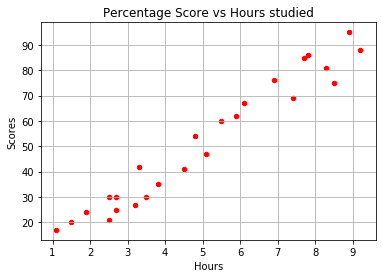

In [6]:
data.plot(x='Hours', y='Scores', kind='scatter', grid=True, c='r')
plt.title("Percentage Score vs Hours studied")

The variables are exhibiting a linear relationship

### Defining the data variables
In order to apply a supervised machine learning algorithm to make predictions, we will first define and separate the dependent(DV) and independent variables(IV)

In [7]:
#independent variable
X = data.drop(['Scores'], axis=1) 

#dependent variable : variable we need to predict
Y = data.drop(['Hours'], axis=1) 

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

### Fitting Linear Regression Model
Since both the variables are continuous and expected prediction is also numeric as opposed to a category, linear regression is the best fit.

In [9]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()   #instantiating a regression model
reg.fit(train_x, train_y)  #fitting training data/feeding values to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Validating the data

In [10]:
pred = reg.predict(test_x)
pred

array([[96.72435947],
       [77.78401908],
       [39.90333832],
       [89.35867154],
       [34.64213266]])

In [11]:
np.column_stack((test_y.values, pred))

array([[88.        , 96.72435947],
       [69.        , 77.78401908],
       [35.        , 39.90333832],
       [75.        , 89.35867154],
       [42.        , 34.64213266]])

### Finding model efficiency and accuracy

In [12]:
acc = reg.score(X,Y)
print('Accuracy:', acc) 

Accuracy: 0.9451349245424989


In [13]:
from sklearn import metrics 
err = metrics.mean_absolute_error(test_y, pred)
print('Mean Absolute Error:', err) 

Mean Absolute Error: 8.82565115049766


### Making Predictions using the model
Given hours of study: 9.25 per day, we have to predicted the score.

In [14]:
hours = 9.25
predicted_score = reg.predict([[9.25]])
predicted_score[0][0]

97.25048003289072

Thanks!